# Analysis of text

In [1]:
import pandas as pd
import re
from collections import Counter
import nltk


In [2]:
unlabeled = pd.read_csv("../../data/intermediate/unlabeled.csv", index_col=False)
train = pd.read_csv("../../data/intermediate/train.csv", index_col=False)
valid = pd.read_csv("../../data/intermediate/valid.csv", index_col=False)
test = pd.read_csv("../../data/intermediate/test.csv", index_col=False)

In [3]:
unlabeled

ticket                                   problem_abstract
0     306416331                          BLMO ALRMS - TOUR'S START
1     306423610  V211200276 & V211200279 CFB: Cheez-It Bowl: Cl...
2     306428596                            BLMO ALRMS - TOUR'S END
3     306428597                                  DAILY T/U  - 13 -
4     306435661                               Reference V220100002
...         ...                                                ...
8056  308345363  Eli Lilly - New Ticketable Event - UNSUPPORTED...
8057  308344850                       SDB connect direct issue\n\n
8058  308338613       Unable to login into the Remote Desktop(GUI)
8059  308325557  [What's New] Button overlaps with the magnifyi...
8060  308315266  Getting error when Creating CR/SRs in serviceN...

[8061 rows x 2 columns]

In [4]:
train

ticket                                   problem_abstract  \
0     312119433        AOTS ticket creation fails for MGLBCLF1SP01   
1     310159465                      Question on a possible Update   
2     305477651  I was not able to change password with below e...   
3     307153442                        Unable to login to switches   
4     310483144               Remove user from Vattenfall Domains    
...         ...                                                ...   
2712  315394803  Wrong port mapping, receiving unnecessary alar...   
2713  305125475  Attn:  Mohan Periyasamy  Please add Circuit ID...   
2714  311311840  I have submitted 3 request regarding my webche...   
2715  313280985  Myself, and other contractors cannot access a ...   
2716  306033234  Unable to login to ACTION (Linux DMS Servers) ...   

                      team  hours_to_resolve  
0           smarts/gfp_cpe                86  
1                 netbrain               606  
2                     gtac                 2  
3                     gtac               447  
4                     gtac               100  
...                    ...               ...  
2712        smarts/gfp_cpe                 0  
2713                global                66  
2714     dtac/dsg webcheck              1009  
2715                  gtac               775  
2716  configuration backup                47  

[2717 rows x 4 columns]

In [5]:
df = train.append(unlabeled, ignore_index=True)
df

ticket                                   problem_abstract  \
0      312119433        AOTS ticket creation fails for MGLBCLF1SP01   
1      310159465                      Question on a possible Update   
2      305477651  I was not able to change password with below e...   
3      307153442                        Unable to login to switches   
4      310483144               Remove user from Vattenfall Domains    
...          ...                                                ...   
10773  308345363  Eli Lilly - New Ticketable Event - UNSUPPORTED...   
10774  308344850                       SDB connect direct issue\n\n   
10775  308338613       Unable to login into the Remote Desktop(GUI)   
10776  308325557  [What's New] Button overlaps with the magnifyi...   
10777  308315266  Getting error when Creating CR/SRs in serviceN...   

                 team  hours_to_resolve  
0      smarts/gfp_cpe              86.0  
1            netbrain             606.0  
2                gtac               2.0  
3                gtac             447.0  
4                gtac             100.0  
...               ...               ...  
10773             NaN               NaN  
10774             NaN               NaN  
10775             NaN               NaN  
10776             NaN               NaN  
10777             NaN               NaN  

[10778 rows x 4 columns]

In [6]:
nltk.download('stopwords')

def tokenize(text, stopwords=None):
    if not text or pd.isna(text):
        return []
    words = re.findall(r'\b\w+\b', text.lower())
    if stopwords is not None:
        words = [w for w in words if w not in stopwords]
    return words

# apply tokenization to text column and count occurrences
tokens = df['problem_abstract'].apply(tokenize).sum()
token_counts = Counter(tokens)

# print the 10 most frequent tokens
most_common_tokens = token_counts.most_common(10)
for token, count in most_common_tokens:
    print(f'{token}: {count}')

stopwords = set(nltk.corpus.stopwords.words('english'))
tokens_without_stopwords = df['problem_abstract'].apply(lambda s: tokenize(s, stopwords)).sum()
token_counts = Counter(tokens_without_stopwords)

# print the 10 most frequent tokens
print("WITHOUT STOPWORDS: ")
most_common_tokens = token_counts.most_common(10)
for token, count in most_common_tokens:
    print(f'{token}: {count}')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dominik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


to: 2959
22: 1934
for: 1692
the: 1559
not: 1097
in: 1073
reference: 986
and: 947
on: 897
please: 763
WITHOUT STOPWORDS: 
22: 1934
reference: 986
please: 763
2022: 698
2: 674
access: 577
ticket: 576
1: 561
need: 541
sr: 537


<AxesSubplot:>

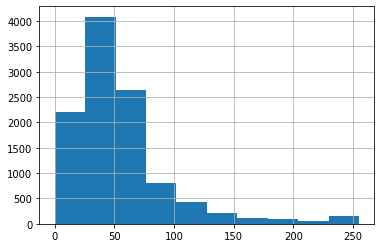

In [7]:
# count how many tokens and how many chars
df["problem_abstract"].apply(lambda s: 0 if pd.isna(s) else len(s)).hist()


<AxesSubplot:>

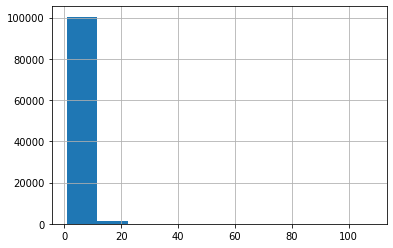

In [8]:
pd.Series(tokens).apply(len).hist()

<AxesSubplot:>

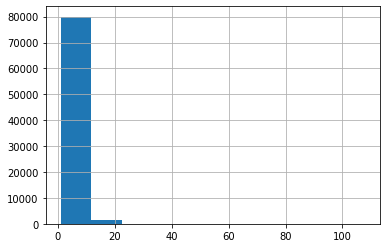

In [9]:
pd.Series(tokens_without_stopwords).apply(len).hist()

In [10]:
def clean_text(df: pd.DataFrame) -> pd.DataFrame:

    result = df.copy()
    result["problem_abstract"] = result["problem_abstract"].apply(lambda s: s.strip() if not pd.isna(s) else s)
    return result

clean_text(train).to_csv("../../data/prepared/train.csv", index=False)
clean_text(test).to_csv("../../data/prepared/test.csv", index=False)
clean_text(valid).to_csv("../../data/prepared/valid.csv", index=False)
clean_text(unlabeled).to_csv("../../data/prepared/unlabeled.csv", index=False)